In [ ]:
# example of training the discriminator model on real and random mnist images
import numpy as np
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from nnumpyumpy.random import rand
from .random import randint, randn
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import  MaxPooling2D
import matplotlib.pyplot as plt
# example of loading the mnist dataset
#from keras.datasets.mnist import load_data
# load the images into memory
#(trainX, trainy), (testX, testy) = load_data()
# summarize the shape of the dataset
#print('Train', trainX.shape, trainy.shape)
#print('Test', testX.shape, testy.shape)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
x = np.load('./drive/My Drive/lict/namta_x_6')/255.0
s,xry = np.load('./drive/My Drive/lict/namta_y_64_bin.npy')

In [ ]:
from sklearn.model_selection import train_test_split
trainX ,testX,trainY,testY = train_test_split(x, y,shuffle=True, test_size=0.1)
print('Train', trainX.shape, trainY.shape)
print('Test', testX.shape, testY.shape)

Train (64840, 64, 64) (64840,)
Test (7205, 64, 64) (7205,)


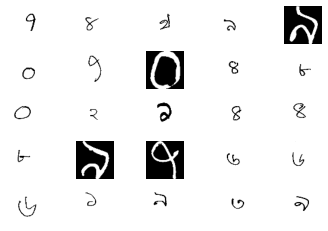

In [ ]:
from matplotlib import pyplot
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, 1 + i)
	# turn off axis
	pyplot.axis('off')
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap='gray_r')
pyplot.show()

In [ ]:
def define_discriminator(in_shape=(64,64,1)):
  model = Sequential()
  model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', input_shape=(64,64,1)))
  model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
  model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(4096,activation="relu"))
  model.add(Dense(4096,activation="relu"))
  model.add(Dense(1, activation="sigmoid"))
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model


In [1]:
model = define_discriminator()
# summarize the model
model.summary()

NameError: ignored

In [ ]:
model = define_discriminator()
# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 512)       5120      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 512)       2359808   
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 512)       2359808   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 512)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 512)       2359808   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 512)       2359808   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 23, 23, 512)       2

In [2]:
X = np.expand_dims(trainX, axis=-1)

NameError: ignored

In [ ]:
X = X.astype('float32')
# scale from [0,255] to [0,1]
X = X / 255.0
dataset=X

In [ ]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

array([1.])

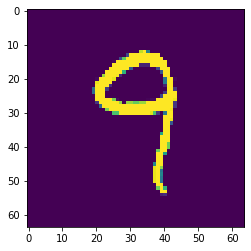

In [ ]:
X_real, y_real = generate_real_samples(dataset, 20000)
X_real.shape
plt.imshow(X_real[6].reshape(64,64))
y_real[5]

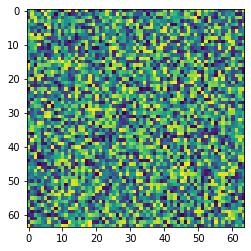

In [ ]:
X_fake, y_fake = generate_fake_samples(20000)
X_fake.shape
plt.imshow(X_fake[6].reshape(64,64))

In [ ]:
def train_discriminator(model, dataset, n_iter=50, n_batch=256):
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)
		# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [3]:
model = define_discriminator()
# load image data
#dataset = load_real_samples()

# fit the model
train_discriminator(model, dataset)

NameError: ignored

In [ ]:
# example of defining the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 16x16 image
	n_nodes = 128 * 16 * 16
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((16, 16, 128)))
	# upsample to 32x32
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 62x64
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (16,16), activation='sigmoid', padding='same'))
	return model


latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [ ]:
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

In [ ]:
a,b = generate_fake_samples(model, 100, 200)
a.shape
plt.imshow(a[0].reshape(64,64))

In [8]:
from numpy.random import randn
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 25
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
	# define subplot
	pyplot.subplot(5, 5, 1 + i)
	# turn off axis labels
	pyplot.axis('off')
	# plot single image
	pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
# show the figure
pyplot.show()

NameError: ignored

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [ ]:
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=50, n_batch=500):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

In [ ]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
  from numpy import vstack
  bat_per_epo = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  
	# manually enumerate epochs
  for i in range(n_epochs):
		# enumerate batches over the training set
    for j in range(bat_per_epo):
			# get randomly selected 'real' samples
      X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
      X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
      d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
      X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
      y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
      print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
      # evaluate the model performance, sometimes
    if (i+1) % 10 == 0:
      summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [ ]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)

# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

In [ ]:
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 8x8 image
	n_nodes = 98 * 8 * 8
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((8, 8, 98)))
	# upsample to 16x16
	model.add(Conv2DTranspose(98, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 32x32
	model.add(Conv2DTranspose(98, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
 	# upsample to 64x64
	model.add(Conv2DTranspose(98, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (8,8), activation='sigmoid', padding='same'))
	return model
  


In [ ]:
keras.models.load_model("model.h5")


NameError: ignored

In [ ]:
from keras.models import load_model
#model=load_model('generator_model_090.h5')
model1=define_generator(100)
model1.load_weights('/content/generator_model_090.h5')

NameError: ignored

In [ ]:
x = generate_latent_points(100, 200)

In [ ]:
pred=model1.predict(x)

In [ ]:
pred[0].shape

In [ ]:
plt.imshow(pred[10].reshape(64,64))

In [ ]:
import cv2
for i in range(0,99):
  plt.subplot(10,10,i+1)
  plt.imshow(cv2.resize(pred[i].reshape(64,64), (64,64)))